## Very undeveloped file for plots - more to come. This is just to make a new branch mainly

In [1]:
from preprocessing import get_complete_flights
from preprocessing import haversine
from assign_origin import assign_origin
from traffic.core import Traffic
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [2]:
airports = pd.read_csv('data/airports_coordinates.csv')

file = "Frankfurt_LH_2205.h5"
t_09 = Traffic.from_file(file, key="LH_220509", parse_dates=["day", "firstseen", "hour", "last_position", "lastseen", "timestamp"])

In [3]:
dft09 = t_09.data
#Adding a column of the haversine distance from EDDF at every row in the dataset
dft09["distance"] = haversine(dft09["latitude"], dft09["longitude"], 50.0271, 8.53356)

In [4]:
#Ordering the columns in a certain order
dft09 = dft09.reindex(columns= ['timestamp', 'onground', 'callsign', 'flight_id', 'altitude', 'geoaltitude', 'latitude', 'longitude', 'groundspeed', 'vertical_rate', 'distance', 'hour', 'icao24', 'last_position', 'lastseen', 'origin', 'spi', 'squawk', 'track', 'alert', 'day', 'firstseen', 'destination'])

In [5]:
complete_flights_9_may_2022 = get_complete_flights(dft09, None) #Traffic object returned
complete_flight_ids = complete_flights_9_may_2022.flight_ids # Flight IDS of complete flights
complete_flight_dataset = dft09[dft09['flight_id'].isin(complete_flight_ids)]

In [6]:
#Only choosing relevant columns = Airport identifier, Latitude, Longitude
airports = airports[['ident', 'latitude_deg', 'longitude_deg']]

In [7]:
complete_flight_dataset = assign_origin(complete_flight_dataset, airports)

In [8]:
# Function to get airport coordinates by IATA code (ident)
def get_airport_coordinates(ident):
    airport = airports[airports['ident'] == ident]
    if not airport.empty:
        return airport.iloc[0]['latitude_deg'], airport.iloc[0]['longitude_deg']
    else:
        return None

## Incoming flights to Germany

C:\CustomPF\anaconda3\envs\Lufthansa-Arrival-Time-Prediction\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
C:\CustomPF\anaconda3\envs\Lufthansa-Arrival-Time-Prediction\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)


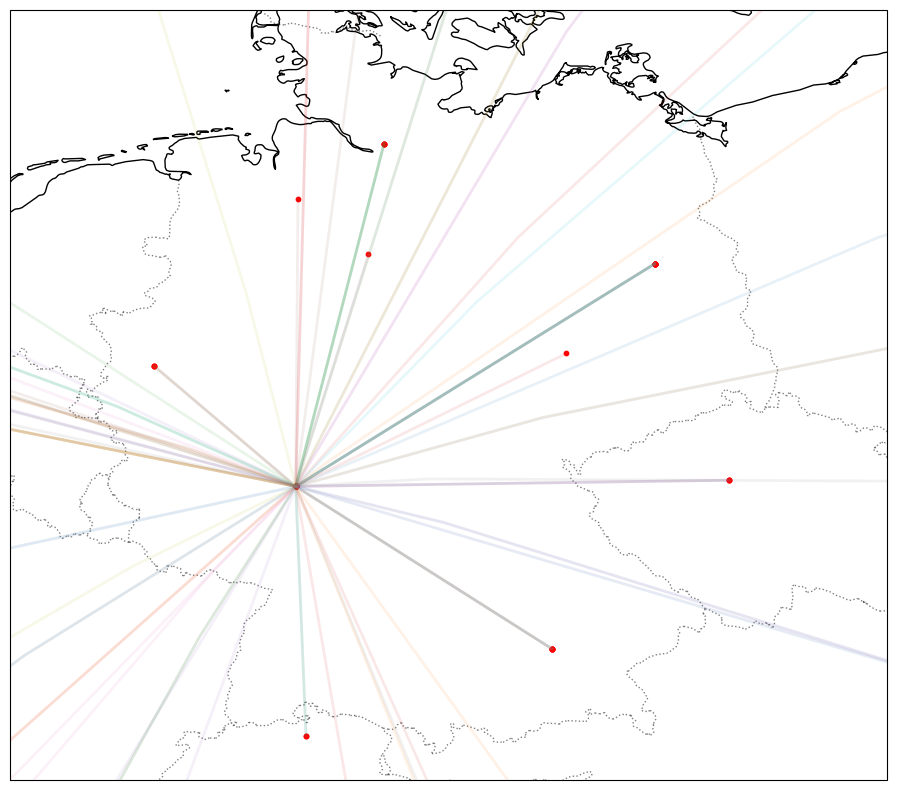

In [9]:
# Set up the Cartopy map with the Robinson projection
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Set the extents to cover Germany only and adding Coastlines and Borders
ax.set_extent([5, 16, 47, 55])
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.5)

# Group dataset by flight_id to get the first row of each flight
grouped_flights = complete_flight_dataset.groupby('flight_id').first().reset_index()

# Plot a curve from origin to destination airport for all flights and mark airports with red dots
for _, flight_data in grouped_flights.iterrows():
    origin_coords = get_airport_coordinates(flight_data['origin'])
    destination_coords = get_airport_coordinates(flight_data['destination'])

    if origin_coords is not None and destination_coords is not None:
        ax.plot([origin_coords[1], destination_coords[1]], [origin_coords[0], destination_coords[0]],
                alpha=0.1, transform=ccrs.Geodetic(), linewidth=2)
        ax.scatter([origin_coords[1], destination_coords[1]], [origin_coords[0], destination_coords[0]],
                   color='red', s=10, transform=ccrs.PlateCarree())

plt.show()


## Incoming flights from all over the world

C:\CustomPF\anaconda3\envs\Lufthansa-Arrival-Time-Prediction\lib\site-packages\cartopy\crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)


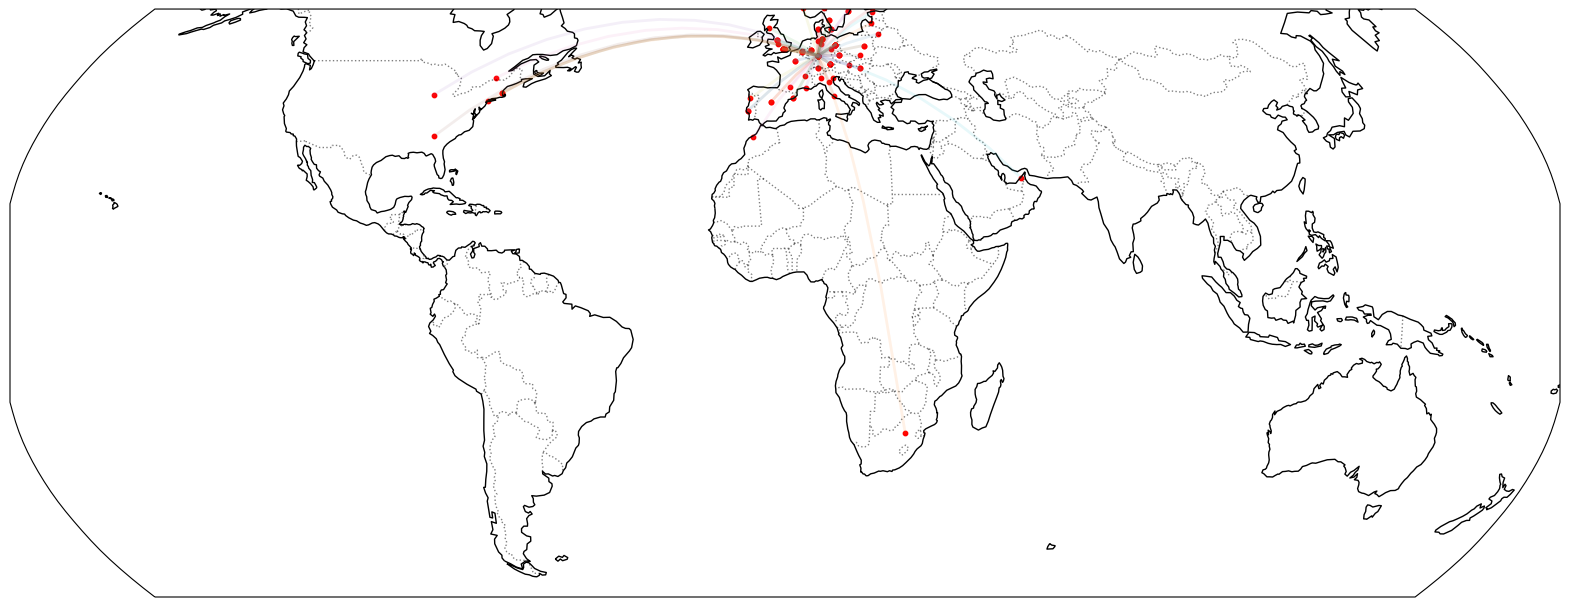

In [10]:
# Set up the Cartopy map with the Robinson projection
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.set_extent([-180, 180, -90, 90])
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.5)

# Group dataset by flight_id to get the first row of each flight
grouped_flights = complete_flight_dataset.groupby('flight_id').first().reset_index()

# Plot a curve from origin to destination airport for all flights and mark airports with red dots
for _, flight_data in grouped_flights.iterrows():
    origin_coords = get_airport_coordinates(flight_data['origin'])
    destination_coords = get_airport_coordinates(flight_data['destination'])

    if origin_coords is not None and destination_coords is not None:
        ax.plot([origin_coords[1], destination_coords[1]], [origin_coords[0], destination_coords[0]],
                alpha=0.1, transform=ccrs.Geodetic(), linewidth=2)
        ax.scatter([origin_coords[1], destination_coords[1]], [origin_coords[0], destination_coords[0]],
                   color='red', s=10, transform=ccrs.PlateCarree())

plt.show()
